### Statistical Inference: Bootstrap Confidence Interval

This notebook demostrates how to construct confidence interval of a statistic using the bootstrap method. We will also examine the coverage probability of CI.

- Construct Bootstrap Confidence Interval
- Check the coverage probability
- Bootstrap CI for correlation coefficient

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Generate some random data


data = np.random.randn(100)*10 + 20

data

array([24.29955515, 26.44440477, 14.36728805, 42.13588748,  9.47609137,
       -0.08571358, 31.07775483, 23.72450737, 32.61083947, 23.72824199,
        9.30319172, 34.93694884,  0.25340004, 23.21862046, 24.12873151,
        8.1867494 , 16.7527962 , 22.79533444, 17.51773743,  9.79280763,
       11.24729501,  3.08123804, 26.31424041, 31.38830525, 15.04772561,
       34.38238961, 32.25606438, 17.969145  , 20.11554963, 11.79351647,
       16.15829909, 38.03830239, 22.30947246, 25.43237254, 24.67149197,
       24.57517686, 16.87400119, 15.79709249, 19.05141854,  1.18961636,
        6.98869421, 12.4038949 , 13.84228829, 13.54433253,  6.08082857,
        6.38539296, 13.88391526, 11.87613397, 22.3770229 , 25.93199593,
       34.77486287, 32.07602857, 25.10844499, -0.84118767, 26.29896417,
       28.43441258, 11.19402986, 20.59536346, 17.56830735, 13.8418428 ,
       29.58029312, 24.19844536, 16.87089374, 22.17170355, 23.98587404,
       12.46117274, 28.17004184, 27.69101527, 25.23572928, 20.95

(array([ 8.,  6., 19., 20., 22., 10., 12.,  3.]),
 array([-2.38065578,  3.18391212,  8.74848003, 14.31304794, 19.87761585,
        25.44218376, 31.00675166, 36.57131957, 42.13588748]),
 <BarContainer object of 8 artists>)

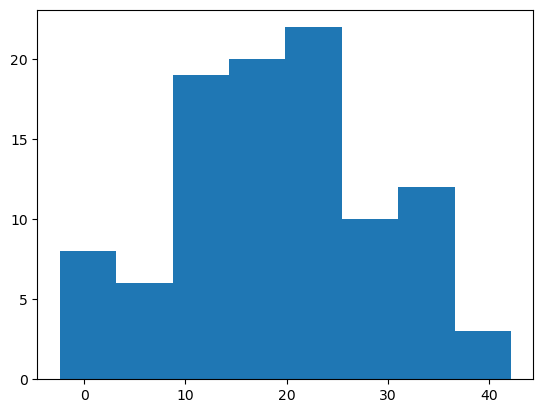

In [3]:
plt.hist(data,bins=8)

In [4]:
print("Population mean is:", np.mean(data))

print("Population variance is:", np.var(data))

Population mean is: 19.195216540763408
Population variance is: 98.34447167519873


In [5]:
#One sample with 60 numbers, this is what we have in hand.

sample_60 = np.random.choice(data, 60, replace=True)

sample_60

array([24.57517686, 13.54433253, 22.45609746, 29.58029312, 24.19844536,
       23.98587404, 14.36728805, 31.38830525, 14.02720151,  6.08082857,
       20.11554963, 22.91210907, 19.8771658 , -0.84118767, 35.19215484,
       32.61083947, 19.8771658 , 13.64205101, 34.38238961,  6.08082857,
       14.52005079, 25.93199593, 11.87613397, 31.07775483,  9.75135765,
       13.8418428 , 25.10844499, 20.9582833 ,  5.68826724,  8.1867494 ,
       33.26631626, 14.52005079, 19.08912054, 22.30947246, 38.06941794,
        9.30319172, 26.31424041, 31.07775483, -0.08571358, 24.67149197,
       19.23244027, 32.25606438, 25.23572928, 32.25606438, 23.72824199,
       23.98587404, 13.64205101, -0.14460301, 19.8771658 , 32.07602857,
       24.19844536, 12.46117274, 25.93199593, 28.43441258, 23.72450737,
       14.36728805, 14.02720151, 17.969145  , 14.52005079, 19.8771658 ])

1. Construct Bootstrap CI

In [6]:
#Define a bootstrap function:
def bootstrap(sample):
    
    bootstrap_mean_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = np.random.choice(sample, len(sample), replace=True)
        
        #compute sub-sample mean
        subsample_mean = np.mean(subsample)

        bootstrap_mean_list.append(subsample_mean)
    
    #Calculatet the mean and std of the bootstrap sampling distribution
    bootstrap_mean = np.mean(bootstrap_mean_list)
    boostrap_std = np.std(bootstrap_mean_list)
    
    # mean +- 2*std for an approximate 95% CI.
    CI = [(bootstrap_mean - 2*boostrap_std), (bootstrap_mean + 2*boostrap_std)]
    
    return CI,bootstrap_mean_list
    

In [7]:
#Do the same thing for the percentile-based method:
def bootstrap_perc(sample):
    
    bootstrap_mean_list = []
    
    for i in range(1000):
        #generate a re-sample with the original sample size, with replacement
        subsample = np.random.choice(sample, len(sample), replace=True)
        
        #compute sample mean
        subsample_mean = np.mean(subsample)

        bootstrap_mean_list.append(subsample_mean)
    
    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_mean_list, 2.5), 
          np.percentile(bootstrap_mean_list, 97.5)]
    
    return percentile_CI,bootstrap_mean_list
    

In [8]:
#Define a anlytical based function:
def anlytical(sample):
    
    sample_mean = np.mean(sample)
    
    err_of_margin = 2*np.std(sample)/np.sqrt(len(sample))
    
    # mean +- 2*std for an approximate 95% CI.
    CI_lower = sample_mean - err_of_margin
    CI_upper = sample_mean + err_of_margin
    
    CI = [CI_lower, CI_upper]
    
    return CI

Compare the bootstrap vs. analytical CI:

In [9]:
bootstrap_CI, bootstrap_mean_list = bootstrap(sample_60)
bootstrap_CI_perc, bootstrap_mean_list_perc = bootstrap_perc(sample_60)
analytical_CI = anlytical(sample_60)

In [10]:
print("95% analytical CI: ", analytical_CI)
print("95% bootstrap CI: ", bootstrap_CI)
print("95% percentile-based bootstrap CI: ", bootstrap_CI_perc)

95% analytical CI:  [17.80310863501788, 22.569743864386272]
95% bootstrap CI:  [17.7992414635296, 22.57299843927282]
95% percentile-based bootstrap CI:  [17.923184204643533, 22.452141595638295]


2. Testing the coverage of the 95% CI for 
- Bootstrap
- Percentile based Bootstrap
- Analytical

In [11]:
%%time
#generate samples for multiple times
counter = 0
counter_perc = 0
true_mean = np.mean(data)

for i in range(1000):
    #generate a sample with 60 numbers
    sample = np.random.choice(data, 60, replace=True)
    
    #For each sample, we compute the two CIs:
    ci,_ = bootstrap(sample)
    perc_ci,_ = bootstrap_perc(sample)
    analytical_ci = anlytical(sample)
    
    #Check the coverage
    if ci[0] <= true_mean <= ci[1]:
        counter = counter + 1
        
    if perc_ci[0] <= true_mean <= perc_ci[1]:
        counter_perc = counter_perc + 1

CPU times: user 1min 16s, sys: 234 ms, total: 1min 16s
Wall time: 1min 17s


In [12]:
print("Number of times 95% bootstrap CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% bootstrap CI covered the population mean: 953 out of 1000


In [13]:
print("Number of times 95% percentile-based bootstrap CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% percentile-based bootstrap CI covered the population mean: 953 out of 1000


In [14]:
print("Number of times 95% analytical CI covered the population mean:", 
      counter,"out of 1000")

Number of times 95% analytical CI covered the population mean: 953 out of 1000


3. Bootstrap confidence interval for correlation coefficients

In [15]:
import pandas as pd
url = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/mpg.csv'
df = pd.read_csv(url)
df = df.dropna()

Text(0, 0.5, 'Acceleration')

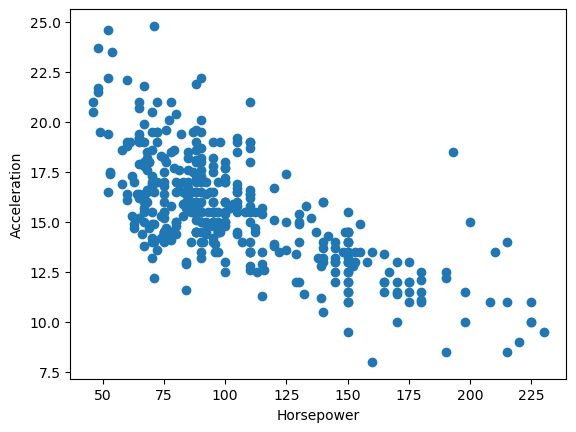

In [16]:
from scipy.stats import *

plt.scatter(df.horsepower, df.acceleration)
plt.xlabel("Horsepower")
plt.ylabel("Acceleration")

In [17]:
print("Pearson:",pearsonr(df.horsepower, df.acceleration))

Pearson: PearsonRResult(statistic=-0.6891955103342371, pvalue=1.5818862297811214e-56)


In [18]:
sample_car = df.sample(frac=0.3,replace=True)
sample_car

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
239,30.0,4,97.0,67.0,1985,16.4,77,japan,subaru dl
201,18.5,6,250.0,110.0,3645,16.2,76,usa,pontiac ventura sj
103,11.0,8,400.0,150.0,4997,14.0,73,usa,chevrolet impala
39,14.0,8,400.0,175.0,4464,11.5,71,usa,pontiac catalina brougham
293,31.9,4,89.0,71.0,1925,14.0,79,europe,vw rabbit custom
...,...,...,...,...,...,...,...,...,...
10,15.0,8,383.0,170.0,3563,10.0,70,usa,dodge challenger se
202,17.5,6,258.0,95.0,3193,17.8,76,usa,amc pacer d/l
55,27.0,4,97.0,60.0,1834,19.0,71,europe,volkswagen model 111
58,25.0,4,97.5,80.0,2126,17.0,72,usa,dodge colt hardtop


In [19]:
print("Pearson:",pearsonr(sample_car.horsepower, sample_car.acceleration))

Pearson: PearsonRResult(statistic=-0.7216468007291635, pvalue=3.009276427821484e-20)


In [24]:
#Define a bootstrap function:
def bootstrap_pearson(sample_car):
    
    bootstrap_cor_list = []
    
    for i in range(10000):
        #generate a re-sample with the original sample size, with replacement
        subsample = sample_car.sample(len(sample), replace=True)
        
        #compute correlation
        sample_cor = pearsonr(subsample.horsepower, subsample.acceleration)[0]

        bootstrap_cor_list.append(sample_cor)
    
    #Get the lower and upper bound for the middle 95%:
    percentile_CI = [np.percentile(bootstrap_cor_list, 2.5), 
          np.percentile(bootstrap_cor_list, 97.5)]
    
    return percentile_CI
    

In [25]:
ci = bootstrap_pearson(sample_car)

print(ci)

[-0.8345225981476501, -0.5797997615643876]


In [33]:
print("95% confidence interval of the Pearson correlation coefficient is:[" + str(np.round(ci[0],2)) + " to "
      + str(np.round(ci[1],2)) + "]")


95% confidence interval of the Pearson correlation coefficient is:[-0.83 to -0.58]


In [36]:
print("We are 95% confident that the true correlation of HP and ACC in the population is between: " 
      + str(np.round(ci[0],2)) + " and "
      + str(np.round(ci[1],2)))


We are 95% confident that the true correlation of HP and ACC in the population is between: -0.83 and -0.58


This means that if we were to take numerous samples and build a confidence interval from each of them, approximately 95% of those intervals would contain the true parameter value.

In this case, the CI doesn't cover 0, which means population correlation coefficient is not zero. So the negative trend we observe from the sample isn't just becuase of the sampling variation but because the true correlation is negative in the population.